In [1]:
import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm

from src.graphgen.graph_analyzer import *


Loaded Graph: {'Number of Nodes': 271, 'Number of Edges': 3683, 'Average Degree': '27.181', 'Clustering Coefficient': '0.376', 'Betweenness Centrality': '0.0043', 'Modularity': '0.256', 'Assortativity': '-0.018', 'Jaccard Similarity': '1.000'}
Erdos Renyi: {'Number of Nodes': 271, 'Number of Edges': 3581, 'Average Degree': '26.428', 'Clustering Coefficient': '0.098', 'Betweenness Centrality': '0.0036', 'Modularity': '0.145', 'Assortativity': '-0.024', 'Jaccard Similarity': '0.070'}
Barabasi Albert: {'Number of Nodes': 271, 'Number of Edges': 1330, 'Average Degree': '9.815', 'Clustering Coefficient': '0.095', 'Betweenness Centrality': '0.0059', 'Modularity': '0.271', 'Assortativity': '-0.079', 'Jaccard Similarity': '0.074'}
Watts Strogatz: {'Number of Nodes': 271, 'Number of Edges': 542, 'Average Degree': '4.000', 'Clustering Coefficient': '0.268', 'Betweenness Centrality': '0.0157', 'Modularity': '0.715', 'Assortativity': '0.027', 'Jaccard Similarity': '0.112'}
Powerlaw Cluster: {'Numb

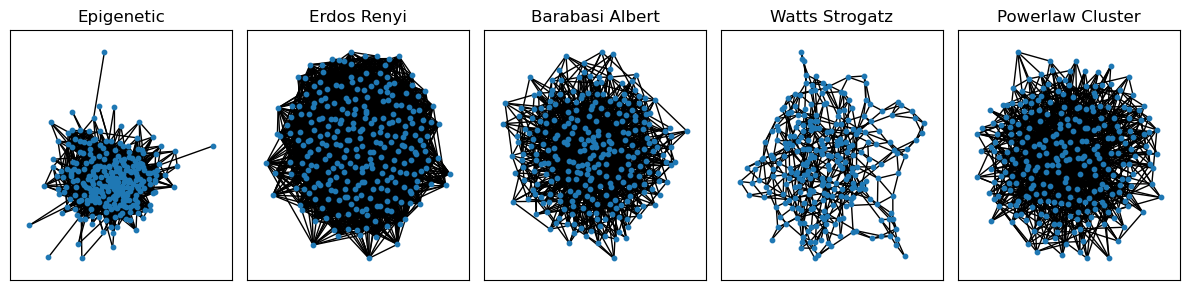

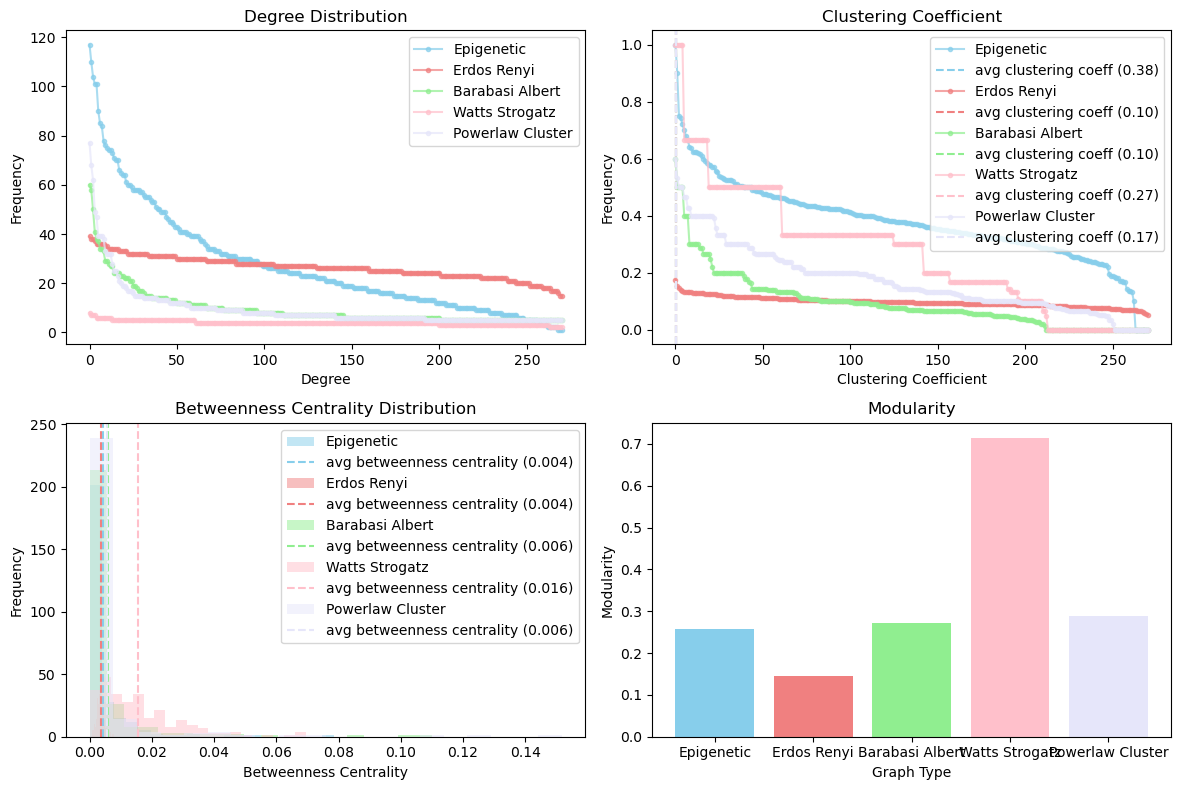

In [9]:
analyzer = GraphAnalyzer('data/biodomain_edge_indices/Epigenetic.npy',
                         'data/biodomain_edge_indices/num_nodes.json',
                         'Epigenetic')
for key, value in analyzer.calculate_graph_properties().items():
    print(f'{key}: {value}')
analyzer.visualize_graph()
analyzer.visualize_distribution()

Loaded Graph: {'Number of Nodes': 738, 'Number of Edges': 10408, 'Average Degree': '28.206', 'Clustering Coefficient': '0.337', 'Betweenness Centrality': '0.0021', 'Modularity': '0.423', 'Assortativity': '-0.019', 'Jaccard Similarity': '1.000'}
Erdos Renyi: {'Number of Nodes': 738, 'Number of Edges': 10350, 'Average Degree': '28.049', 'Clustering Coefficient': '0.037', 'Betweenness Centrality': '0.0018', 'Modularity': '0.151', 'Assortativity': '0.010', 'Jaccard Similarity': '0.032'}
Barabasi Albert: {'Number of Nodes': 738, 'Number of Edges': 3665, 'Average Degree': '9.932', 'Clustering Coefficient': '0.047', 'Betweenness Centrality': '0.0026', 'Modularity': '0.277', 'Assortativity': '-0.059', 'Jaccard Similarity': '0.030'}
Watts Strogatz: {'Number of Nodes': 738, 'Number of Edges': 1476, 'Average Degree': '4.000', 'Clustering Coefficient': '0.263', 'Betweenness Centrality': '0.0076', 'Modularity': '0.755', 'Assortativity': '-0.055', 'Jaccard Similarity': '0.131'}
Powerlaw Cluster: {'N

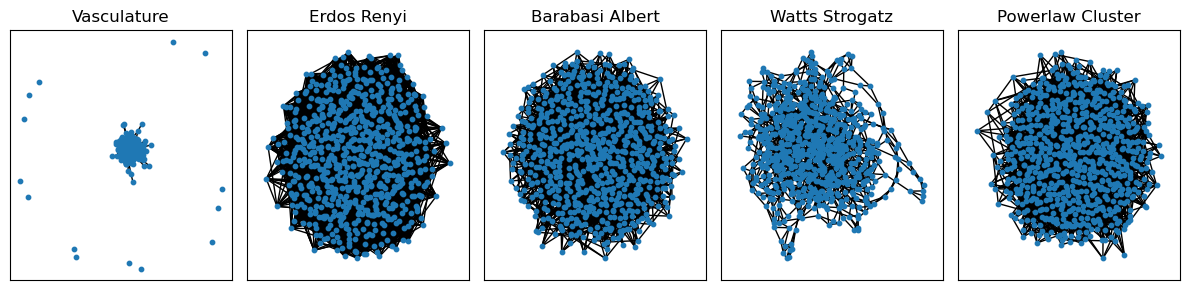

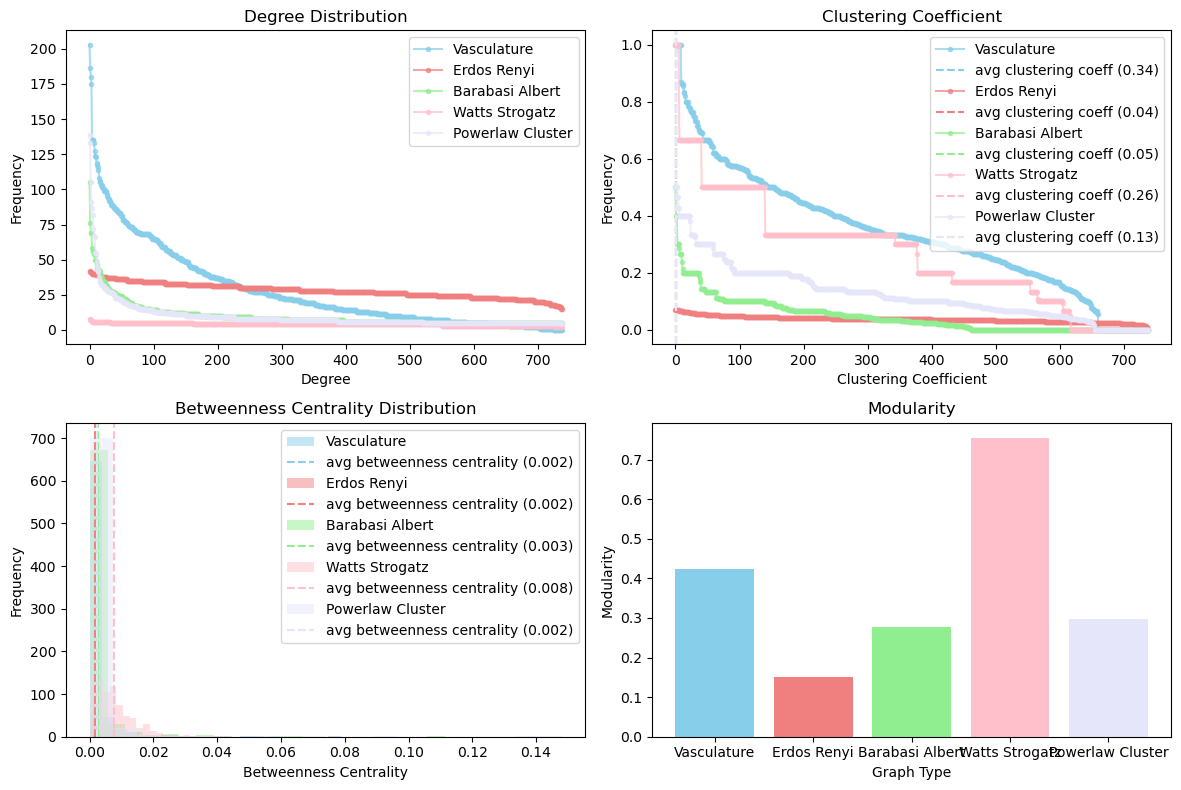

In [8]:
analyzer = GraphAnalyzer('data/biodomain_edge_indices/Vasculature.npy',
                         'data/biodomain_edge_indices/num_nodes.json',
                         'Vasculature')
for key, value in analyzer.calculate_graph_properties().items():
    print(f'{key}: {value}')
analyzer.visualize_graph()
analyzer.visualize_distribution()

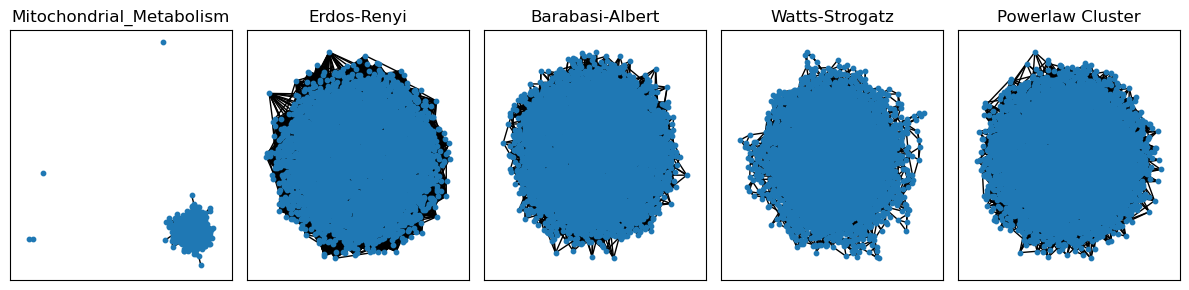

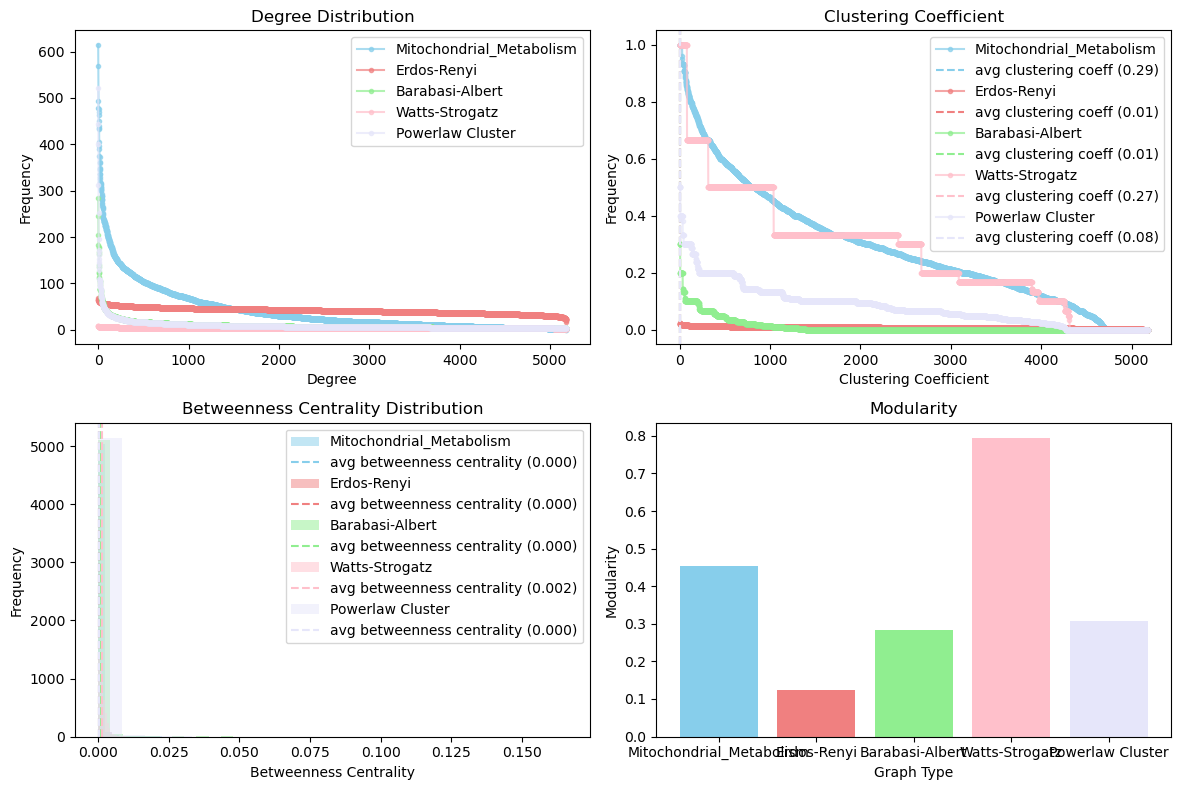

Erdos-Renyi: 0.00808359282744971
Barabasi-Albert: 0.009009066651154429
Watts-Strogatz: 0.11754107950945698
Powerlaw Cluster: 0.00812043282491188


In [16]:
analyzer = GraphAnalyzer('data/biodomain_edge_indices/Mitochondrial_Metabolism.npy',
                         'data/biodomain_edge_indices/num_nodes.json',
                         'Mitochondrial_Metabolism')
analyzer.visualize_graph()
analyzer.visualize_distribution()
for graph_type, coefficient in analyzer.calculate_jaccard_similarity().items():
    print(f"{graph_type}: {coefficient}")

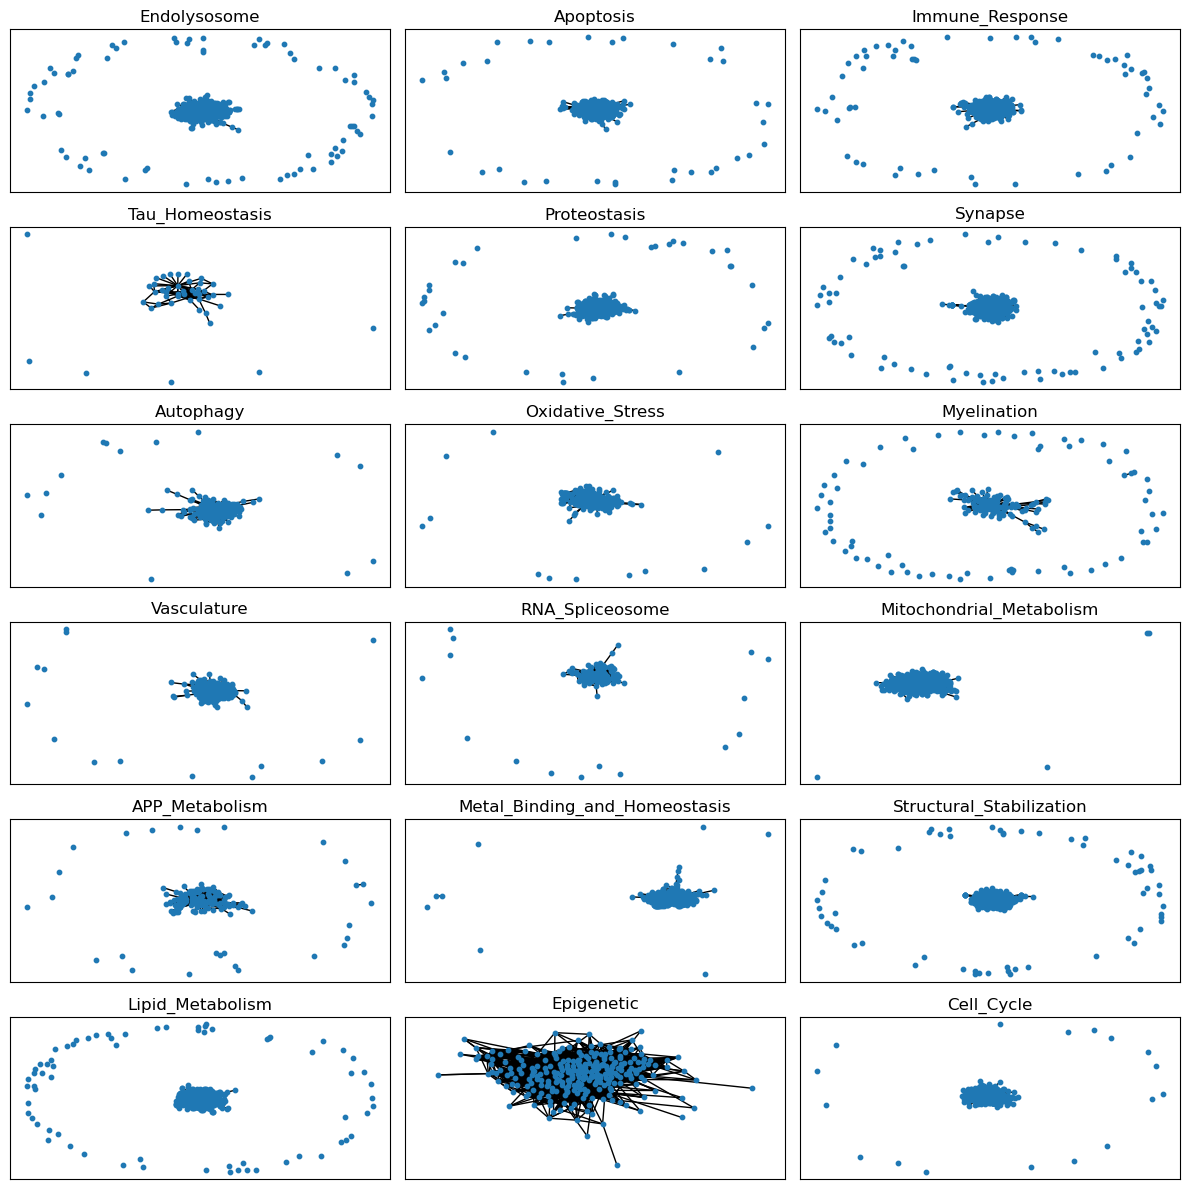

In [9]:
dataset_files = {}
for file in glob.glob('data/biodomain_edge_indices/*.npy'):
    dataset_files[file.split('/')[-1].split('.')[0]] = file
_, ax = plt.subplots(6, 3, figsize=(12, 12))

for i, (key, value) in enumerate(dataset_files.items()):
    analyzer = GraphAnalyzer(value,
                             'data/biodomain_edge_indices/num_nodes.json',
                             key, generate_graphs=False)
    random_color = lambda x: np.random.rand(3,)
    visualizer = GraphVisualizer([analyzer.get_graph()], [key], [random_color])
    visualizer.plot_network_graph(ax[i//3, i%3], graph_index=0, with_labels=False, node_size=10)
plt.tight_layout()
plt.show()

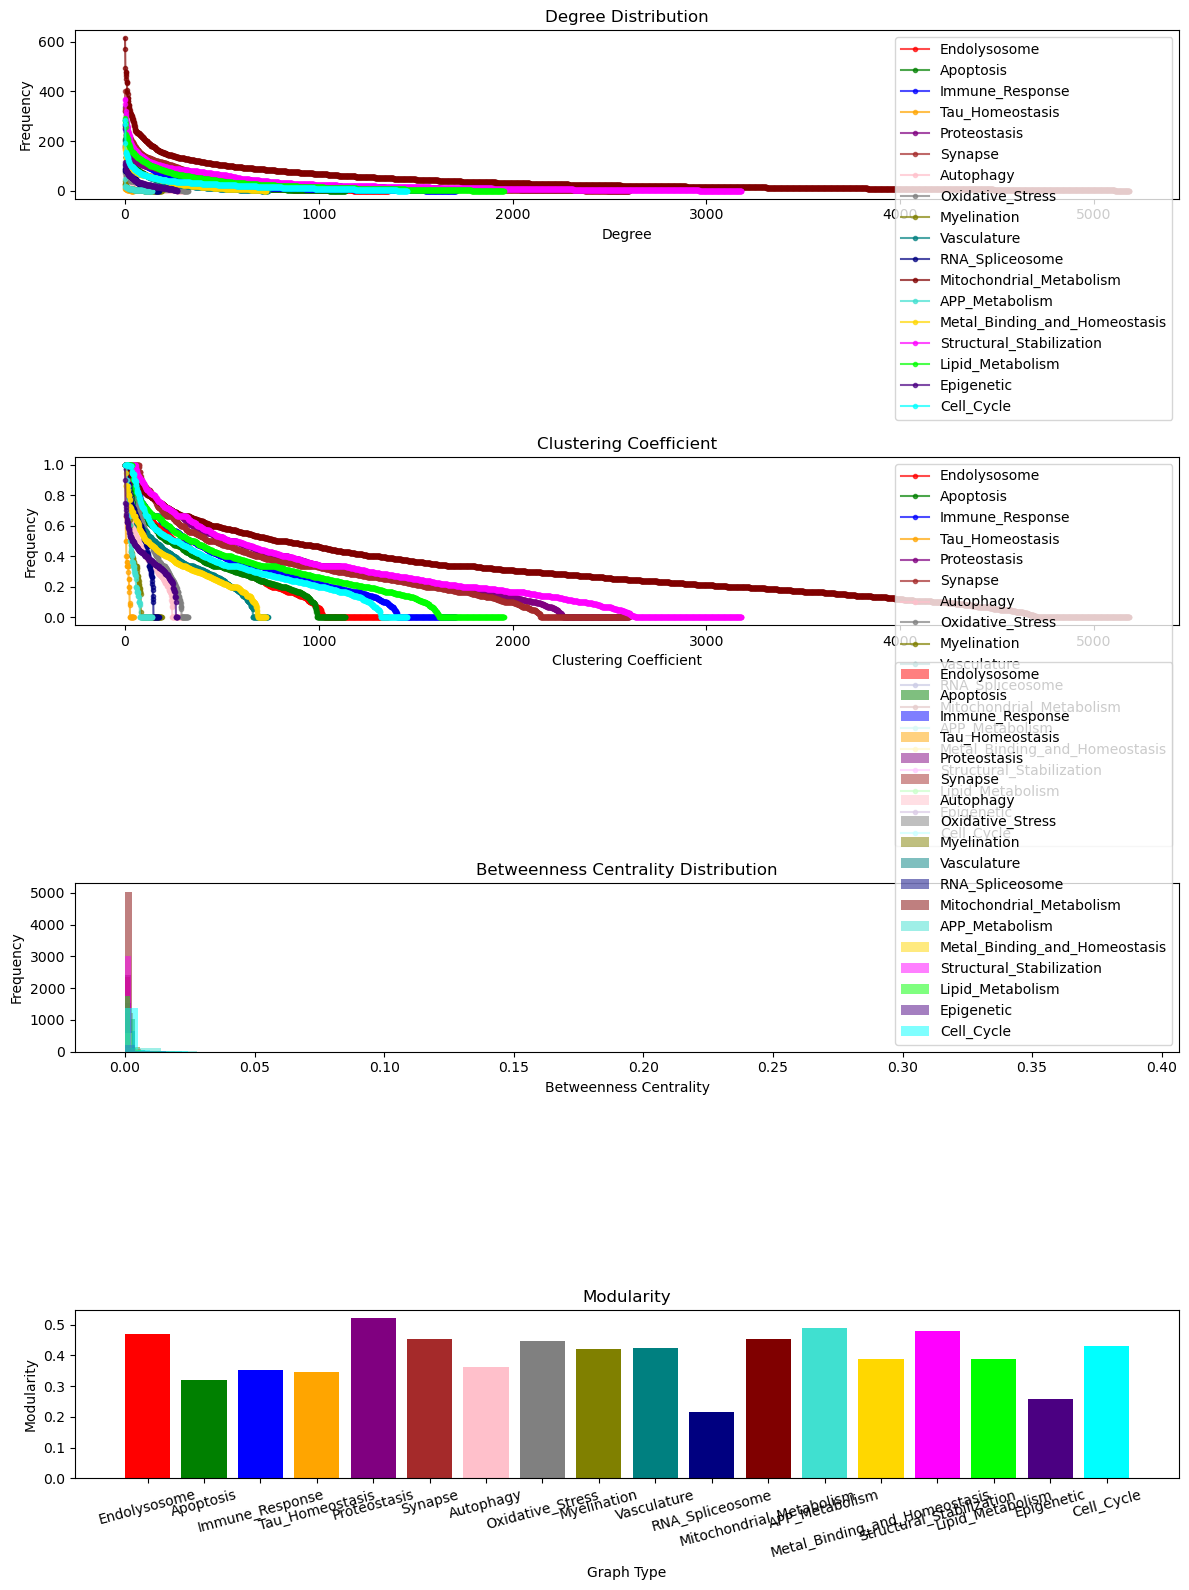

In [2]:
dataset_files = {}
for file in glob.glob('data/biodomain_edge_indices/*.npy'):
    dataset_files[file.split('/')[-1].split('.')[0]] = file

graph_list = []
graph_names = []
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown',
          'pink', 'gray', 'olive', 'teal', 'navy', 'maroon',
          'turquoise', 'gold', 'magenta', 'lime', 'indigo', 'cyan']
for i, (key, value) in enumerate(dataset_files.items()):
    analyzer = GraphAnalyzer(value,
                             'data/biodomain_edge_indices/num_nodes.json',
                             key, generate_graphs=False)
    graph_list.append(analyzer.get_graph())
    graph_names.append(key)

_, ax = plt.subplots(4, 1, figsize=(12, 16))
visualizer = GraphVisualizer(graph_list, graph_names, colors)
visualizer.plot_degree_distribution(ax[0])
visualizer.plot_clustering_coefficient_distribution(ax[1], show_avg=False)
visualizer.plot_betweenness_centrality_distribution(ax[2], show_avg=False)
visualizer.plot_modularity(ax[3])
ax[3].tick_params(axis='x', labelrotation=15)
plt.tight_layout()
plt.show()

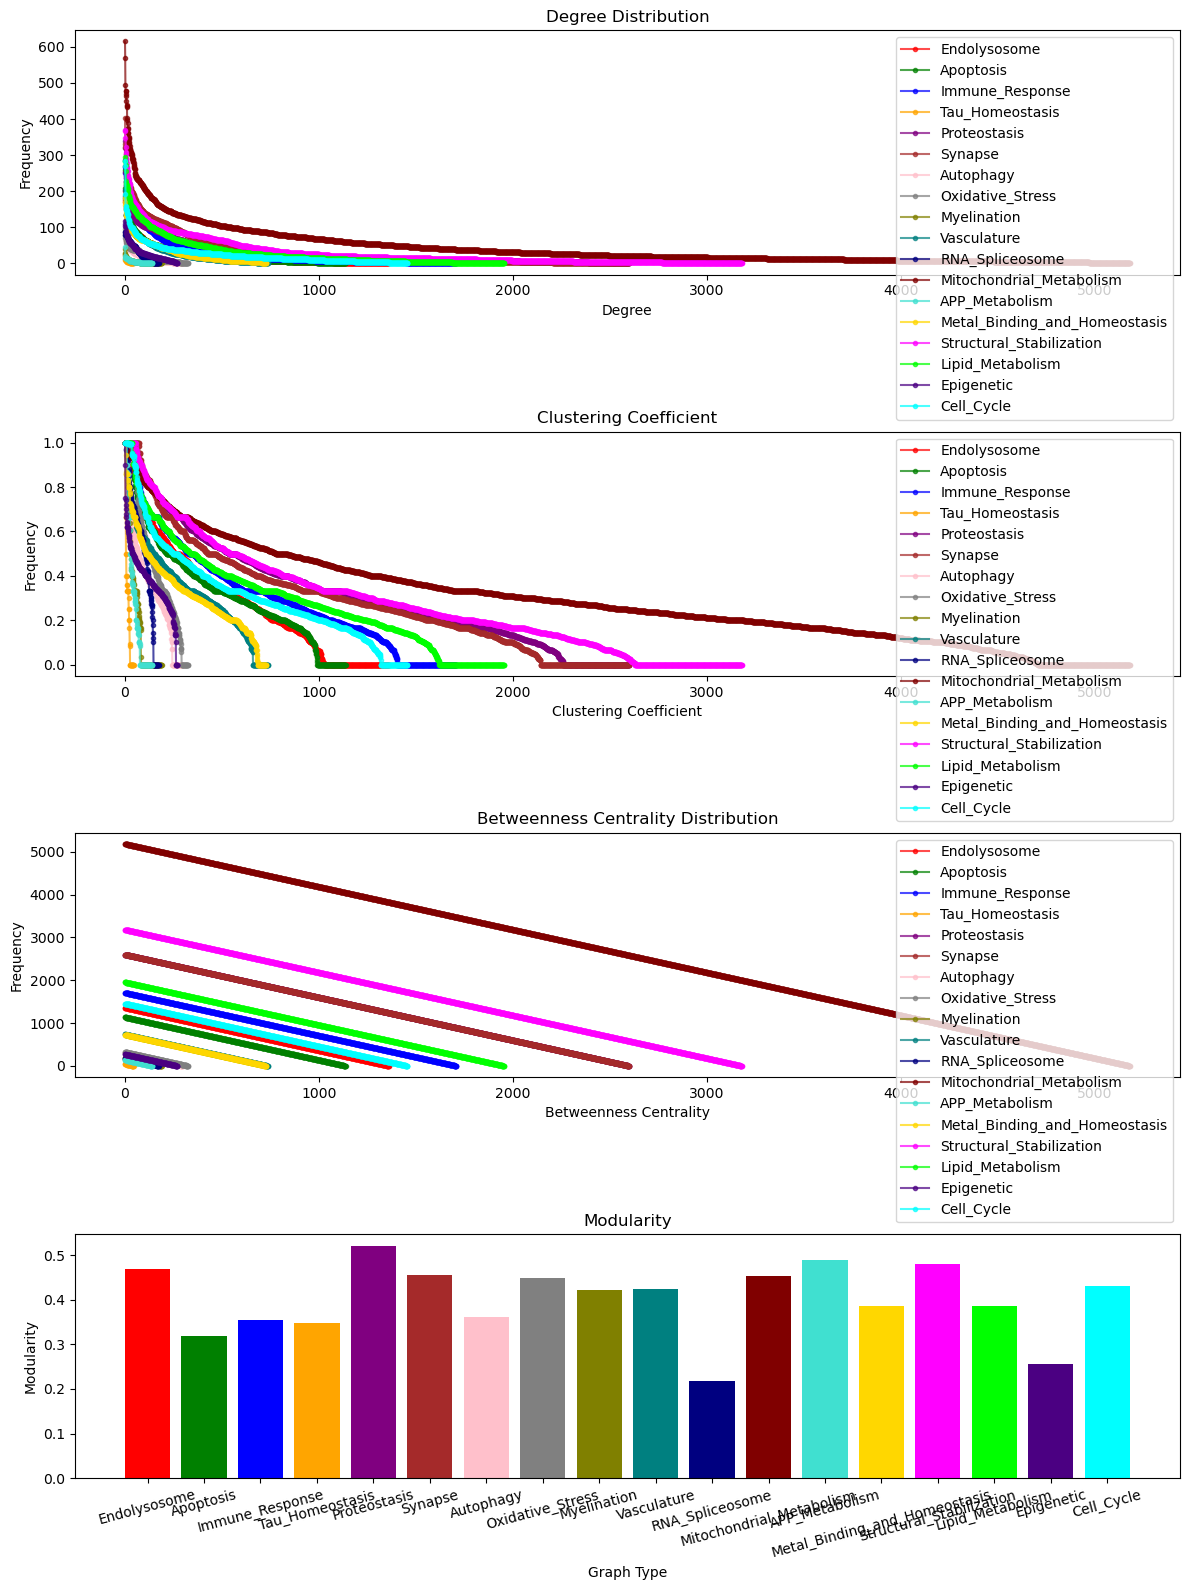

In [2]:
dataset_files = {}
for file in glob.glob('data/biodomain_edge_indices/*.npy'):
    dataset_files[file.split('/')[-1].split('.')[0]] = file

graph_list = []
graph_names = []
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown',
          'pink', 'gray', 'olive', 'teal', 'navy', 'maroon',
          'turquoise', 'gold', 'magenta', 'lime', 'indigo', 'cyan']
for i, (key, value) in enumerate(dataset_files.items()):
    analyzer = GraphAnalyzer(value,
                             'data/biodomain_edge_indices/num_nodes.json',
                             key, generate_graphs=False)
    graph_list.append(analyzer.get_graph())
    graph_names.append(key)

_, ax = plt.subplots(4, 1, figsize=(12, 16))
visualizer = GraphVisualizer(graph_list, graph_names, colors)
visualizer.plot_degree_distribution(ax[0])
visualizer.plot_clustering_coefficient_distribution(ax[1], show_avg=False)
visualizer.plot_betweenness_centrality_distribution(ax[2], show_avg=False)
visualizer.plot_modularity(ax[3])
ax[3].tick_params(axis='x', labelrotation=15)
plt.tight_layout()
plt.show()

In [10]:
# Get a list of dataset files
out_file_name = 'gene_graph_analysis'
dataset_files = glob.glob('data/biodomain_edge_indices/*.npy')

gene_graph_analysis = {}
with open(f'{out_file_name}.txt', 'w') as f:
    f.write('Gene Graph Analysis\n')

    for file_path in tqdm(dataset_files):
        file_name = file_path.split('/')[-1].split('.')[0]
        with open(f'{out_file_name}.txt', 'a') as f:
            f.write(f'\nDATASET: {file_name}\n')

        analyzer = GraphAnalyzer(file_path, 'data/biodomain_edge_indices/num_nodes.json', file_name)
        graph_properties = analyzer.calculate_graph_properties()

        graph_type_properties = {}
        with open(f'{out_file_name}.txt', 'a') as f:
            for graph_type, properties in graph_properties.items():
                f.write(f'{graph_type}: {properties}\n')
                graph_type_properties[graph_type] = properties
        gene_graph_analysis[file_name] = graph_type_properties
np.save(f'{out_file_name}.npy', gene_graph_analysis)

  0%|          | 0/18 [00:00<?, ?it/s]

100%|██████████| 18/18 [45:55<00:00, 153.09s/it]


In [11]:
data = np.load('gene_graph_analysis.npy', allow_pickle=True).item()
data

{'Endolysosome': {'Loaded Graph': {'Number of Nodes': 1361,
   'Number of Edges': 13157,
   'Average Degree': '19.334',
   'Clustering Coefficient': '0.286',
   'Betweenness Centrality': '0.0014',
   'Modularity': '0.469',
   'Assortativity': '0.208',
   'Jaccard Similarity': '1.000'},
  'Erdos Renyi': {'Number of Nodes': 1361,
   'Number of Edges': 13501,
   'Average Degree': '19.840',
   'Clustering Coefficient': '0.014',
   'Betweenness Centrality': '0.0013',
   'Modularity': '0.189',
   'Assortativity': '-0.001',
   'Jaccard Similarity': '0.012'},
  'Barabasi Albert': {'Number of Nodes': 1361,
   'Number of Edges': 6780,
   'Average Degree': '9.963',
   'Clustering Coefficient': '0.033',
   'Betweenness Centrality': '0.0015',
   'Modularity': '0.282',
   'Assortativity': '-0.059',
   'Jaccard Similarity': '0.011'},
  'Watts Strogatz': {'Number of Nodes': 1361,
   'Number of Edges': 2722,
   'Average Degree': '4.000',
   'Clustering Coefficient': '0.265',
   'Betweenness Centrality'

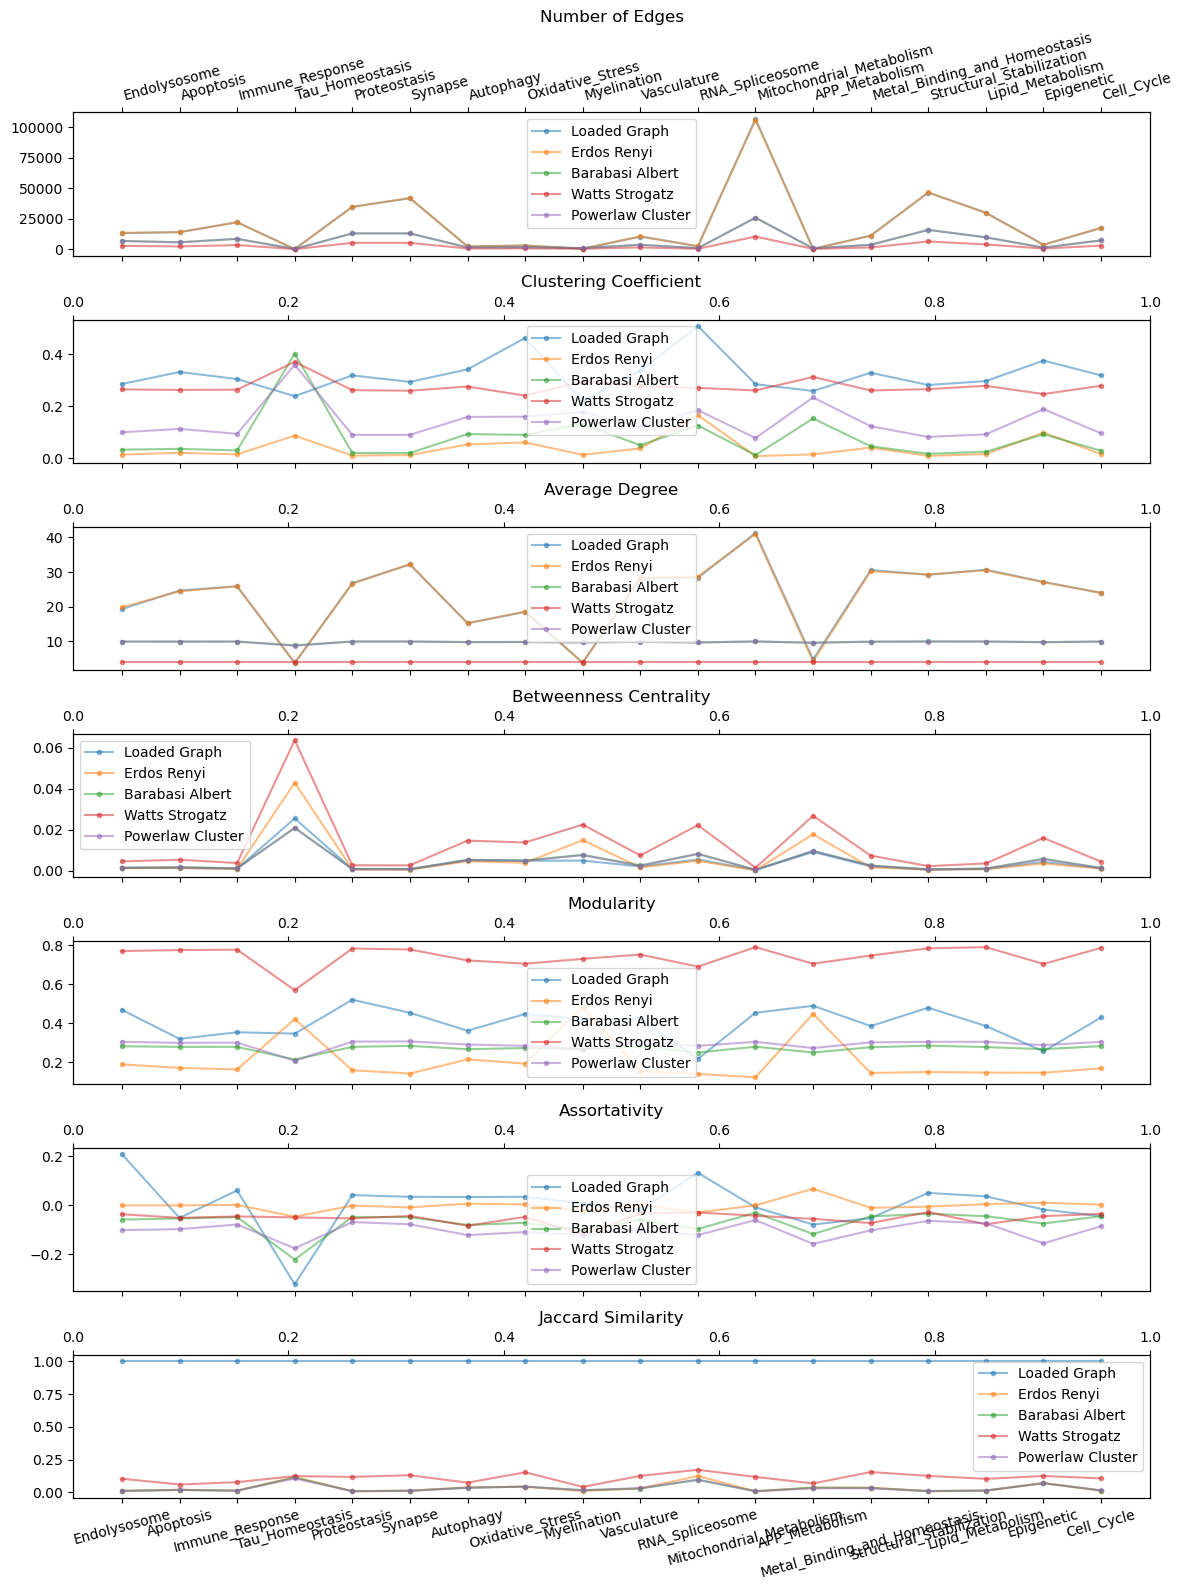

In [13]:
# Get a list of dataset names
dataset_names = list(data.keys())

_, ax = plt.subplots(7, 1, figsize=(12, 16), sharex=True)
axes_top = [ax.twiny() for ax in ax]

for i, property_name in enumerate(
        ['Number of Edges', 'Clustering Coefficient', 'Average Degree', 'Betweenness Centrality', 'Modularity', 'Assortativity', 'Jaccard Similarity']):
    for graph_type in data[dataset_names[0]].keys():
        property_values = [float(data[dataset_name][graph_type][property_name]) for dataset_name in dataset_names]
        ax[i].plot(dataset_names, property_values, label=graph_type, marker='.', alpha=0.5)
        ax[i].set_title(property_name)
        ax[i].tick_params(axis='x', labelrotation=15)
        ax[i].legend()

axes_top[0].set_xlim(ax[i].get_xlim())
axes_top[0].set_xticks(ax[i].get_xticks())
axes_top[0].set_xticklabels(dataset_names, rotation=15, ha='left')

plt.tight_layout()
plt.show()